#Artificial Neural Network 

**Importing the libraries**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tf.__version__

'2.4.1'

**Importing data**

In [ ]:
data=pd.read_csv("/content/heart.csv")

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Identifying the shape 

data.shape

(303, 14)

In [ ]:
# Description about the data

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Data Preprocessing**

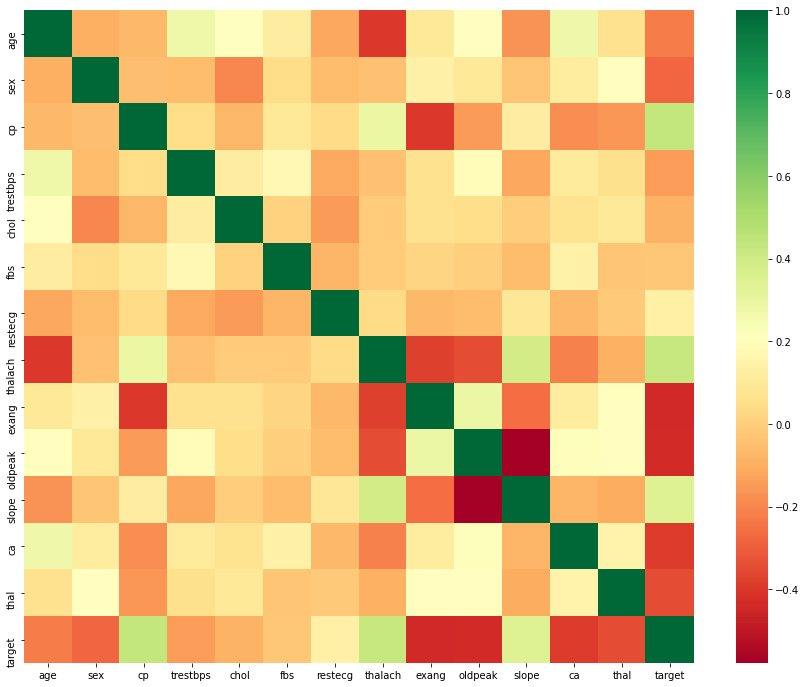

In [ ]:
co_re=data.corr()
plt.figure(figsize=(15,12))
sns.heatmap(co_re, cmap='RdYlGn')

**Histogram **

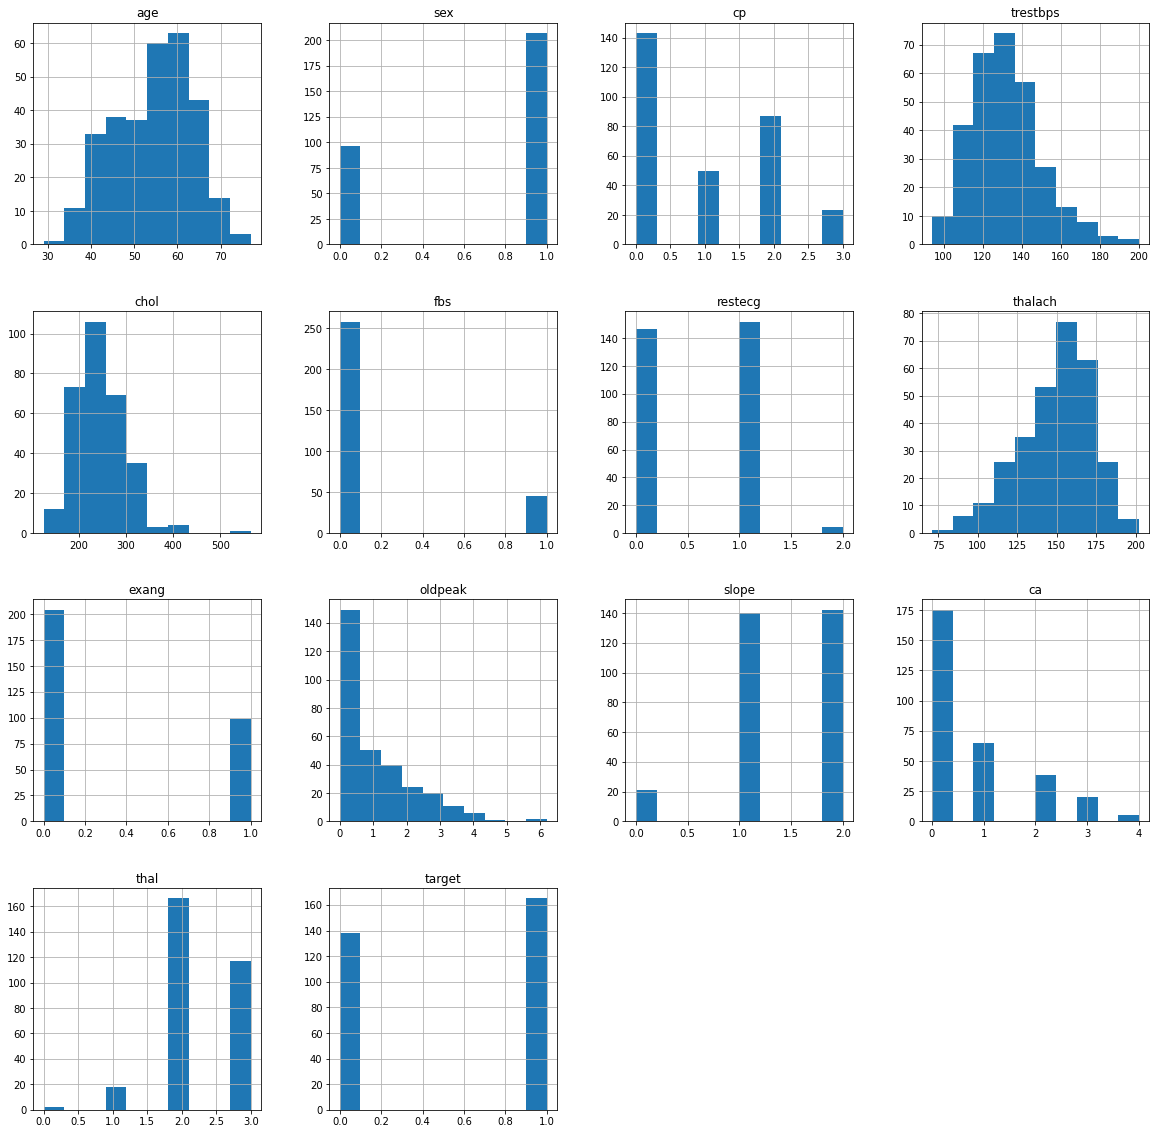

In [ ]:
p = data.hist(figsize = (20,20))

**Splitting the dataset into the Training set and Test set**

In [ ]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#**Building the ANN**

**Initializing the ANN**

In [ ]:
model = tf.keras.models.Sequential()

**Adding the input layer and the first hidden layer**

In [ ]:
model.add(tf.keras.layers.Dense(units=12, activation='relu'))

In [ ]:
model.add(tf.keras.layers.Dense(units=32, activation='relu'))

In [ ]:
model.add(tf.keras.layers.Dense(units=64, activation='relu'))

**Adding the output layer**

In [ ]:
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#**Training the ANN**

**Compiling the ANN**

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Training the ANN on the Training set**

In [ ]:
model.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
8/8 [==============================] - 1s 2ms/step - loss: 0.7552 - accuracy: 0.4497
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7005 - accuracy: 0.5302
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6600 - accuracy: 0.7497
Epoch 4/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6428 - accuracy: 0.7244
Epoch 5/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6080 - accuracy: 0.7292
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5773 - accuracy: 0.7603
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5304 - accuracy: 0.7861
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5018 - accuracy: 0.8053
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4343 - accuracy: 0.8550
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4209 - accuracy: 0.8492
Epoch 11/100
8/8 [===========

**Summary of the Neural network**

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 12)                168       
_________________________________________________________________
dense_14 (Dense)             (None, 32)                416       
_________________________________________________________________
dense_15 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 65        
Total params: 2,761
Trainable params: 2,761
Non-trainable params: 0
_________________________________________________________________


**predection on test data**

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)


**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[22  5]
 [ 4 30]]


0.8524590163934426